In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/'
%cd '/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Omdena/Sudan/EDA/demographics


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/State_and_City.csv")

In [4]:
df.head()

,City,Country,State,Pop2024,Latitude,Longitude
0,Khartoum,Sudan,Khartoum,1974647,15.5518,32.5324
1,Omdurman,Sudan,Khartoum,1200000,15.6445,32.4777
2,Nyala,Sudan,South Darfur,565734,12.0489,24.8807
3,Port Sudan,Sudan,Red Sea,489725,19.6175,37.2164
4,Kassala,Sudan,Kassala,401477,15.4510,36.4000


<ipython-input-5-49986949cc70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Pop2024', data=city_g, palette='Set3')


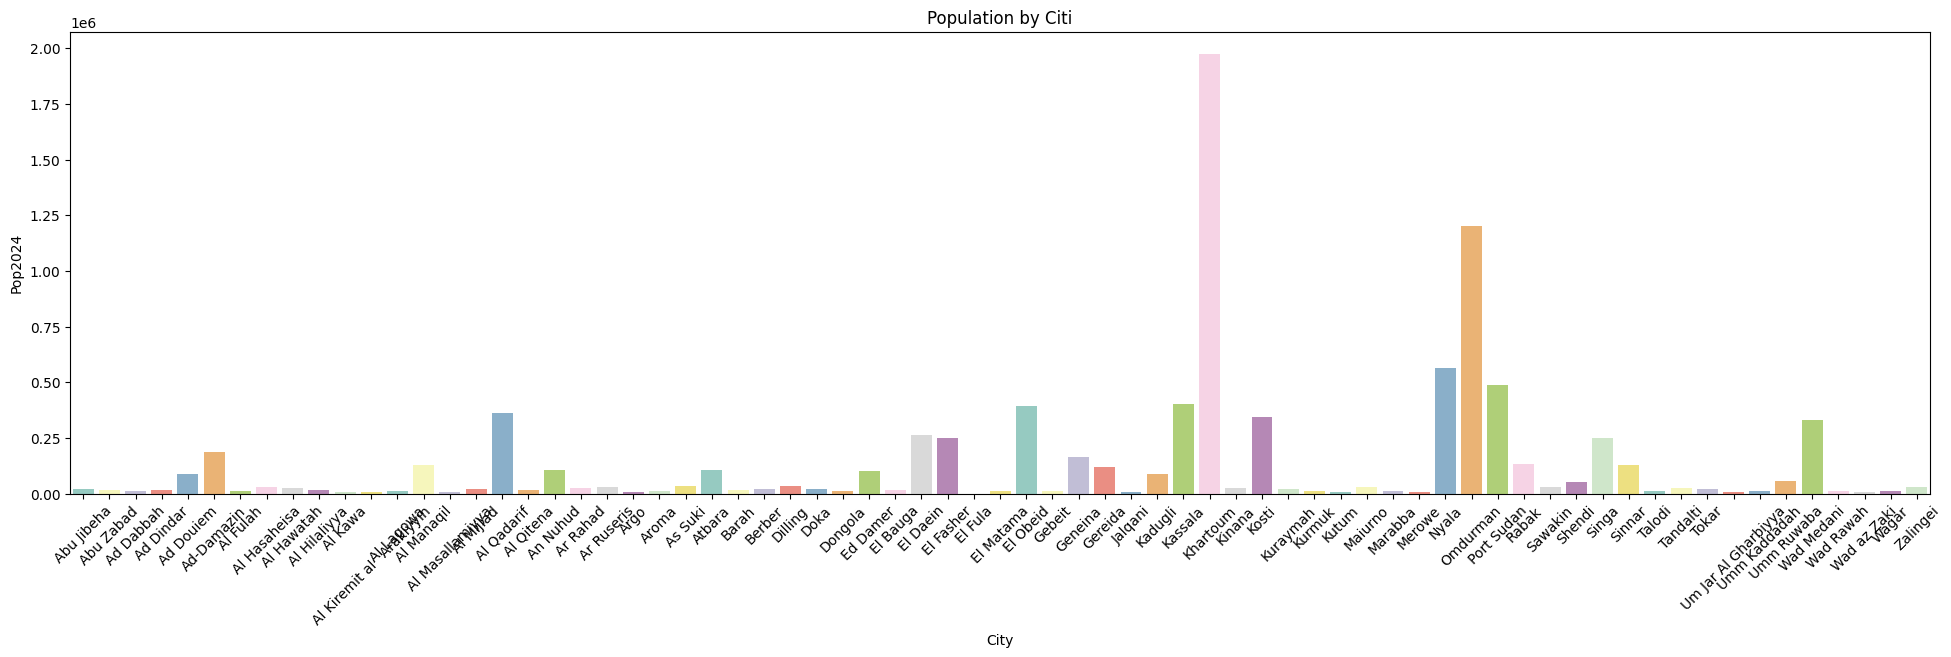

In [5]:
city_g = df.groupby('City')['Pop2024'].sum().reset_index()

plt.figure(figsize=(24, 6))
sns.barplot(x='City', y='Pop2024', data=city_g, palette='Set3')
plt.title('Population by Citi')
plt.xticks(rotation=45)
plt.show()

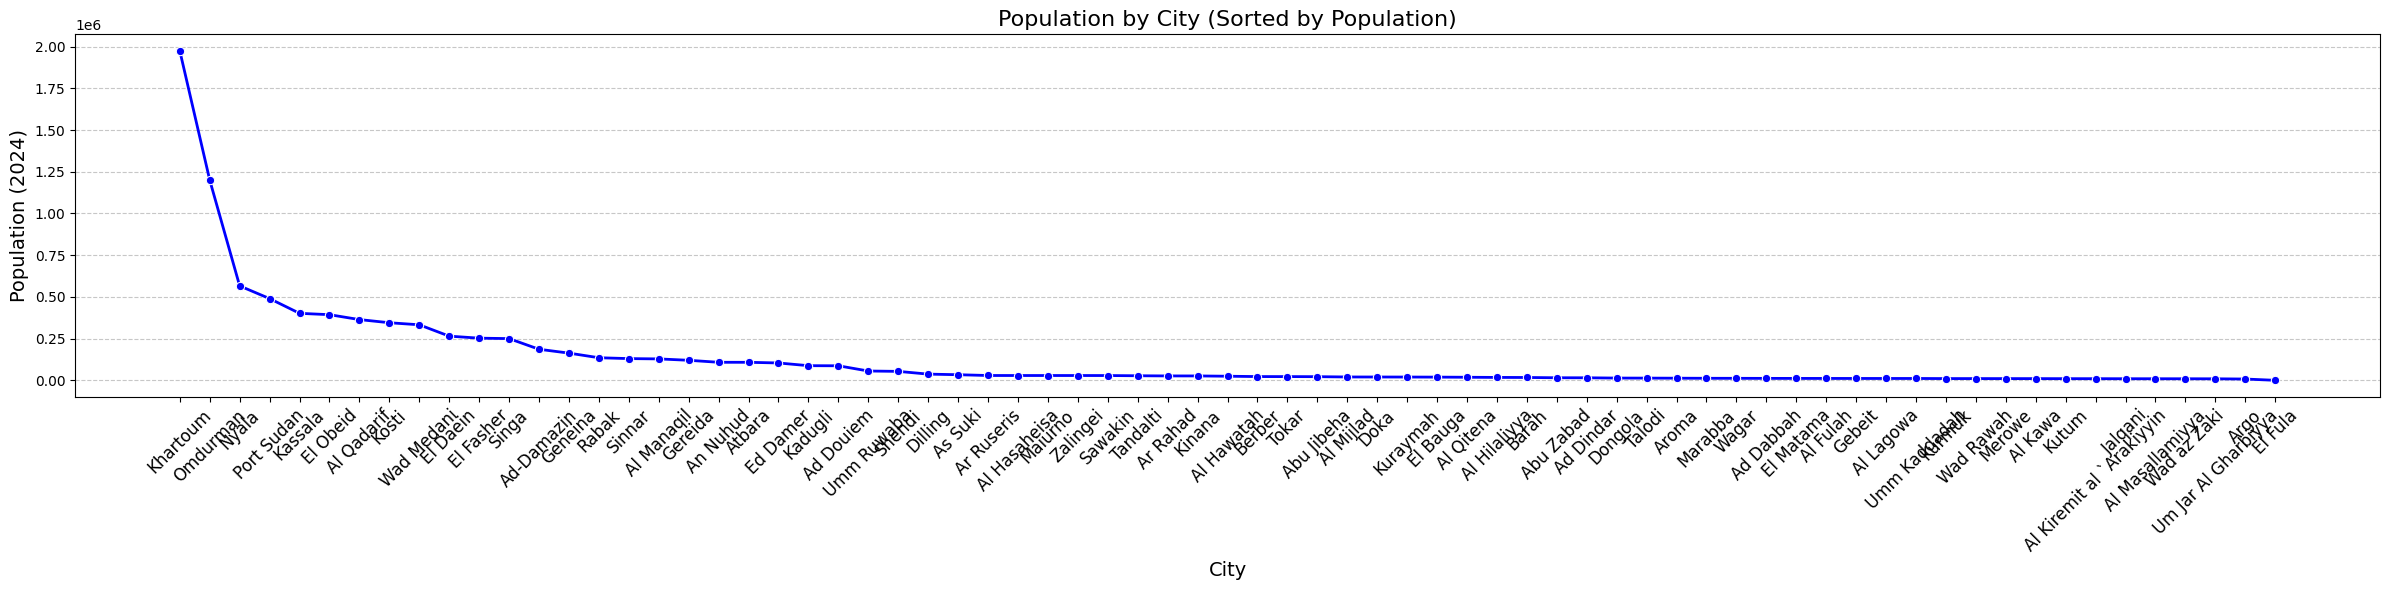

In [6]:
citi_sorted = city_g.sort_values('Pop2024', ascending=False)

plt.figure(figsize=(24, 6))
sns.lineplot(
    x='City',
    y='Pop2024',
    data=citi_sorted,
    marker='o',
    color='blue',
    linewidth=2
)
plt.title('Population by City (Sorted by Population)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Population (2024)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
df2=pd.read_csv('/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/translated_health_facilities.csv')

In [8]:
df2.head()

,name,amenity,addr_city,osm_id,osm_type,geometry,name_english
0,صيدلية الاوركيدة,pharmacy,NaN,7069338988,nodes,POINT (32.4916878 15.4509373),Orchid Pharmacy
1,صيدلية ابو المقداد 9,pharmacy,NaN,7066463168,nodes,POINT (32.489563 15.4430628),Abu Al-Muqdad Pharmacy 9
2,صيدلية اواب,pharmacy,NaN,7066472417,nodes,POINT (32.4903107 15.4404373),Awab Pharmacy
3,صيدلية التفاح الاخضر,pharmacy,NaN,6898081298,nodes,POINT (32.6189537 15.5984329),Green Apple Pharmacy
4,Africa pharmcy,pharmacy,NaN,4548525889,nodes,POINT (32.5694639 15.5330492),Africa pharmcy


In [9]:
df2["Latitude"] = df2["geometry"].str.extract(r"POINT \([\d.]+ ([\d.]+)\)").astype(float)
df2["Longitude"] = df2["geometry"].str.extract(r"POINT \(([\d.]+) [\d.]+\)").astype(float)
print(df2)

                              name   amenity addr_city       osm_id osm_type  \
0                 صيدلية الاوركيدة  pharmacy       NaN   7069338988    nodes   
1             صيدلية ابو المقداد 9  pharmacy       NaN   7066463168    nodes   
2                      صيدلية اواب  pharmacy       NaN   7066472417    nodes   
3             صيدلية التفاح الاخضر  pharmacy       NaN   6898081298    nodes   
4                   Africa pharmcy  pharmacy       NaN   4548525889    nodes   
...                            ...       ...       ...          ...      ...   
1124  منزل العمدة دفع الله محمدعلي    clinic       NaN  11542972770    nodes   
1125                       القيادة    clinic       NaN  11542980469    nodes   
1126               الزرافة البيردة    clinic       NaN  11540038769    nodes   
1127            منزل ال عيسى النور    clinic       NaN  11540038770    nodes   
1128       مركز البقعة لغسيل الكلى  hospital       NaN   7245677450    nodes   

                           geometry    

Using Latitude and Longitude, find the City and State for the Amenities.  

In [10]:
from geopy.distance import geodesic

cities_df = pd.DataFrame(df)

new_df = pd.DataFrame(df2)

def find_closest_city(lat, lon, cities_df):
    min_distance = float("inf")
    closest_city = None
    closest_state = None

    for _, row in cities_df.iterrows():
        city_coords = (row["Latitude"], row["Longitude"])
        point_coords = (lat, lon)
        distance = geodesic(city_coords, point_coords).kilometers

        if distance < min_distance:
            min_distance = distance
            closest_city = row["City"]
            closest_state = row["State"]

    return closest_city, closest_state

results = []
for _, row in new_df.iterrows():
    city, state = find_closest_city(row["Latitude"], row["Longitude"], cities_df)
    results.append({"addr_city": row["addr_city"], "City": city, "State": state})

results_df = pd.DataFrame(results)

print(results_df)

     addr_city       City          State
0          NaN   Khartoum       Khartoum
1          NaN   Khartoum       Khartoum
2          NaN   Khartoum       Khartoum
3          NaN   Khartoum       Khartoum
4          NaN   Khartoum       Khartoum
...        ...        ...            ...
1124       NaN  Al Mijlad  West Kordofan
1125       NaN  Al Mijlad  West Kordofan
1126       NaN  Al Mijlad  West Kordofan
1127       NaN  Al Mijlad  West Kordofan
1128       NaN   Omdurman       Khartoum

[1129 rows x 3 columns]


In [11]:
df2['City'] = results_df['City']
df2['State'] = results_df['State']
df2.head()

,name,amenity,addr_city,osm_id,osm_type,geometry,name_english,Latitude,Longitude,City,State
0,صيدلية الاوركيدة,pharmacy,NaN,7069338988,nodes,POINT (32.4916878 15.4509373),Orchid Pharmacy,15.450937,32.491688,Khartoum,Khartoum
1,صيدلية ابو المقداد 9,pharmacy,NaN,7066463168,nodes,POINT (32.489563 15.4430628),Abu Al-Muqdad Pharmacy 9,15.443063,32.489563,Khartoum,Khartoum
2,صيدلية اواب,pharmacy,NaN,7066472417,nodes,POINT (32.4903107 15.4404373),Awab Pharmacy,15.440437,32.490311,Khartoum,Khartoum
3,صيدلية التفاح الاخضر,pharmacy,NaN,6898081298,nodes,POINT (32.6189537 15.5984329),Green Apple Pharmacy,15.598433,32.618954,Khartoum,Khartoum
4,Africa pharmcy,pharmacy,NaN,4548525889,nodes,POINT (32.5694639 15.5330492),Africa pharmcy,15.533049,32.569464,Khartoum,Khartoum


Most of the amenities are located in Khartoum.

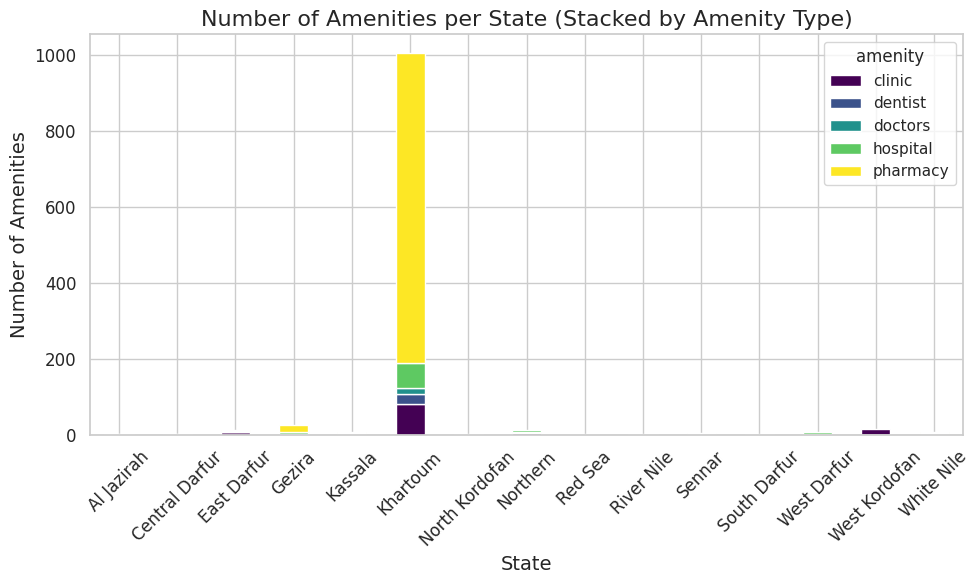

In [12]:
amenity_counts = pd.crosstab(df2['State'], df2['amenity'])

sns.set(style="whitegrid")

amenity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Number of Amenities per State (Stacked by Amenity Type)", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Number of Amenities", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Most of the amenities are located in Khartoum and Omdurman.

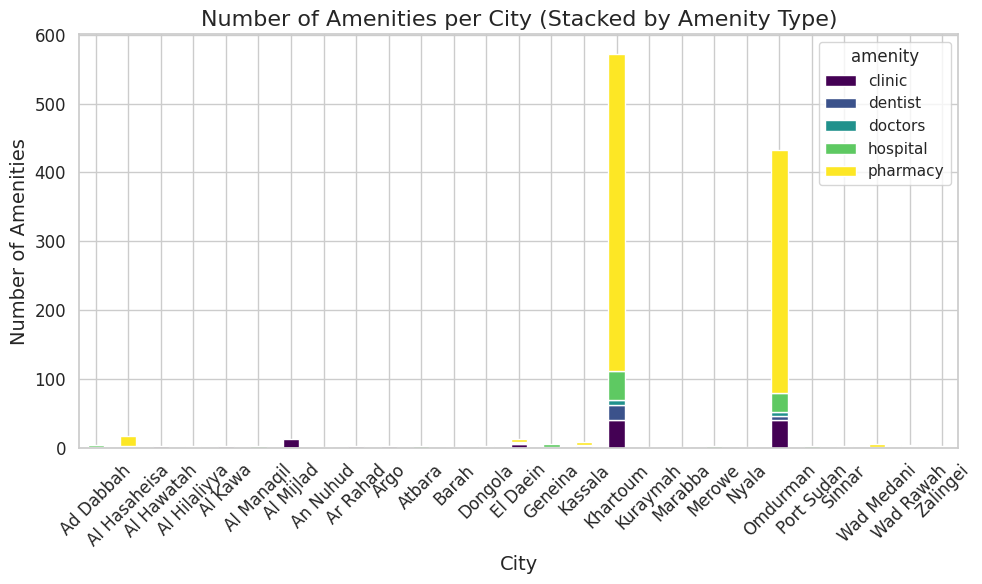

In [13]:
amenity_counts = pd.crosstab(df2['City'], df2['amenity'])

sns.set(style="whitegrid")

amenity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Number of Amenities per City (Stacked by Amenity Type)", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Number of Amenities", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
df2.to_csv("translated_health_facilities_plus_city_state.csv")